# Feature Selection for Classification

In this demo we will use the Titanic dataset, as it contains a class label (survival yes/no), numerical and nominal features

In [5]:
import pandas as pd
import numpy as np

#load titanic dataset from api
df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

# Explore dataset

In [6]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
#describe nominal data
df.describe(include='object')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


Name and ticket consist of mostly unique values, cabin mostly NaN values, so they are clear candidates to be filtered out during feature selection

In [9]:
#describe numerical data
df.describe(include='number')


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Age contains some missing values, survived is the target variable

array([[<Axes: title={'center': 'PassengerId'}>,
        <Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>],
       [<Axes: title={'center': 'Fare'}>, <Axes: >, <Axes: >]],
      dtype=object)

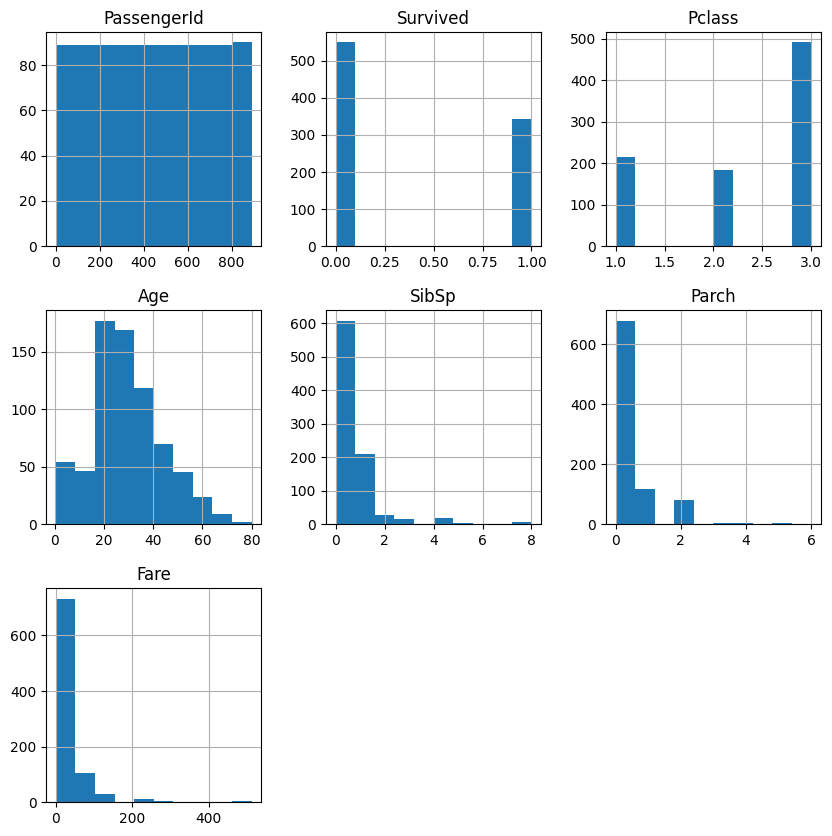

In [10]:
#plot histograms of all numerical data
df.hist(figsize=(10,10))


In [11]:
#show unique values for numerical features with less than 10 unique values
for col in df.columns:
    if df[col].nunique() < 10:
        print(f'{col}: {df[col].unique()}')

Survived: [0 1]
Pclass: [3 1 2]
Sex: ['male' 'female']
SibSp: [1 0 3 4 2 5 8]
Parch: [0 1 2 5 3 4 6]
Embarked: ['S' 'C' 'Q' nan]


In [12]:
#count different values in passenger id
df['PassengerId'].value_counts()

PassengerId
1      1
599    1
588    1
589    1
590    1
      ..
301    1
302    1
303    1
304    1
891    1
Name: count, Length: 891, dtype: int64

passenger-id contains unique values (as it should, therefore also a feature which will be filtered later)

In [13]:
#create label "survived"
label= df['Survived']

#separate/remove survived from features
features = df.drop(columns=['Survived'])

In [14]:
#features
label

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [15]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


# Feature selection by variance and variation ratio

#### Continuous and discrete features which can be used for variance calculation

We will use the features "Fare", "Age", "Passenger ID", "SibSp" and "Parch" to demonstate feature selection by variance

Remark: Strictly speaking, only "Fare" is a continous feature, the other three features are discrete. However, we can calculate variance for "Age" which is ordinal and has large cardinality.

"SibSp" and "Parch" are also ordinal with medium cardinality (7 unique values each). Here we get into the grey zone of statistics, we will calcule variance and variation ratio for those ones. 

"Pclass" is ordinal, but with low cardinality (3 unique values),"Passenger-ID" is also ordinal, but will be filtered out later, so these two numeric features will not be used for the following calculations

In [18]:
variance_features = features.describe(include='number').columns
variance_features = [col for col in variance_features if features[col].nunique() > 3]
variance_features

['PassengerId', 'Age', 'SibSp', 'Parch', 'Fare']

In [462]:
variance_features = ['PassengerId','Age', 'Fare','SibSp','Parch']

In [463]:
#min-max normalize continuous features to be able to compare their variance
for col in variance_features:
    normalized_col = col+'_normalized'
    features[normalized_col] = (features[col] - features[col].min()) / (features[col].max() - features[col].min())

normalized_features = ['PassengerId_normalized','Age_normalized', 'Fare_normalized','SibSp_normalized','Parch_normalized']

#describe normalized data
features[normalized_features].describe()

In [464]:
normalized_features = ['PassengerId_normalized','Age_normalized', 'Fare_normalized','SibSp_normalized','Parch_normalized']

#describe normalized data
features[normalized_features].describe()

,PassengerId_normalized,Age_normalized,Fare_normalized,SibSp_normalized,Parch_normalized
count,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.500000,0.367921,0.062858,0.065376,0.063599
std,0.289162,0.182540,0.096995,0.137843,0.134343
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.247612,0.015440,0.000000,0.000000
50%,0.500000,0.346569,0.028213,0.000000,0.000000
75%,0.750000,0.472229,0.060508,0.125000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


Std values already show that Passenger Id has strongest variance

In [465]:
#calculate variance for normalized features
features[normalized_features].var()

PassengerId_normalized    0.083614
Age_normalized            0.033321
Fare_normalized           0.009408
SibSp_normalized          0.019001
Parch_normalized          0.018048
dtype: float64

Although the size of a party / family (expressed by "SibSp" and "Parch") should have some influence on the label their pure variance is low

Reason: Most parties / families on board have been small (singles or couples)

array([[<Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>]], dtype=object)

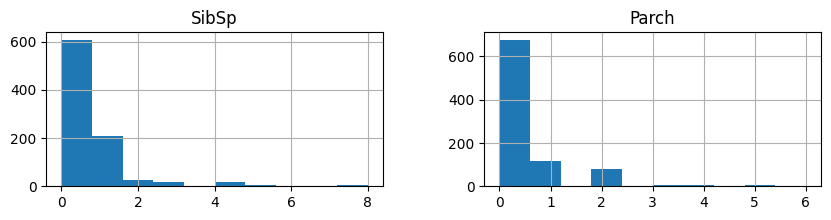

In [466]:
#plot histograms of all numerical data
df[['SibSp','Parch']].hist(figsize=(10,2))

#### Categorical and discrete features which should be checked with variation ratio

We will analyze all meaningfull features accept "Age" and "Fare" and "Passenger Id" calculating variation ratio, including "SibSp" and "Parch" as they do not have an optimal distrubution shape for variance calculations


In [467]:
variation_features = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']
non_continous_feature_data=features[variation_features]

non_continous_feature_data_var = non_continous_feature_data.apply(lambda x: x.value_counts(normalize=True).max(), axis=0)
non_continous_feature_data_var_ratio=1-non_continous_feature_data_var
non_continous_feature_data_var_ratio

In [468]:
#calculate variation ratio for nominal features
#explanation: The value_counts() method counts the number of occurrences of each unique value in the column, 
#and the normalize=True parameter normalizes the counts to represent percentages of the total number of values in the column
non_continous_feature_data_var = non_continous_feature_data.apply(lambda x: x.value_counts(normalize=True).max(), axis=0)
non_continous_feature_data_var_ratio=1-non_continous_feature_data_var
non_continous_feature_data_var_ratio

Pclass      0.448934
Sex         0.352413
SibSp       0.317621
Parch       0.239057
Embarked    0.275591
dtype: float64

# Feature selection for continuous data* using correlation

*and SibSp and Parch

In [469]:
#construct data frame for continuous features and add label 
continous_df=pd.concat([features[variance_features],label],axis=1)
continous_df

,PassengerId,Age,Fare,SibSp,Parch,Survived
0,1,22.0,7.2500,1,0,0
1,2,38.0,71.2833,1,0,1
2,3,26.0,7.9250,0,0,1
3,4,35.0,53.1000,1,0,1
4,5,35.0,8.0500,0,0,0
...,...,...,...,...,...,...
886,887,27.0,13.0000,0,0,0
887,888,19.0,30.0000,0,0,1
888,889,NaN,23.4500,1,2,0
889,890,26.0,30.0000,0,0,1


In [470]:
#calculate correlation between continuous features and label
correlation = continous_df.corr()

<Axes: >

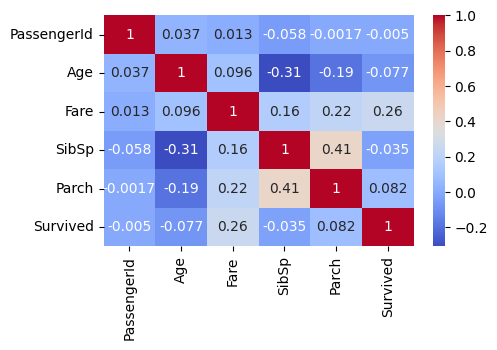

In [471]:
#visualize correlation in a heatmap, low correlation is blue, high correlation is red
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(5,3))
sns.heatmap(correlation, annot=True, cmap='coolwarm')


We can see:
- week correlation between fare and label, but no further correlations (although age should have an effect)
- also not too many colinearities (age/sibsp, parch/sibsp)

# Feature selection for numeric features and nominal label using anova-f statistic

In [473]:
continuous_features=features[variance_features]
#,label

In [474]:
continuous_features['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [475]:
#create new feature "Age_no_missing" and fill missing values with mean
age_no_missing = continuous_features['Age'].fillna(continuous_features['Age'].mean())
continuous_features['Age_no_missing'] = age_no_missing

#Remark: we need the replace missing values for anova test, but we should not replace missing values for the correlation test
#because the correlation test will be biased if we replace missing values

#drop 'Age' column
continuous_features = continuous_features.drop(columns=['Age'])


C:\Users\Hendrik Meth\AppData\Local\Temp\ipykernel_25460\795121854.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  continuous_features['Age_no_missing'] = age_no_missing


In [476]:
#create a new dataframe with p-values of anova test for each numeric feature with label
from scipy.stats import f_oneway
anova_p_values = pd.DataFrame(index=continuous_features.columns, columns=['p-value'])
for i in continuous_features.columns:
    data_anova = pd.concat([continuous_features[i], label], axis=1)
    groups = []
    for j in data_anova['Survived'].unique():
        groups.append(data_anova[data_anova['Survived']==j][i])
    stat, p = f_oneway(*groups)
    anova_p_values.loc[i,'p-value'] = p
anova_p_values


,p-value
PassengerId,0.881366
Fare,0.0
SibSp,0.292244
Parch,0.014799
Age_no_missing,0.037217


- Passenger Id ist not related to label (as expexted)
- Fare is related (this is in sync with the correlation matrix)
- Parch and Age are related (this is NOT in sync with the correlation matrix)
- SibSp will be especially checked in the next section 

C:\Users\Hendrik Meth\AppData\Local\Temp\ipykernel_25460\1520951853.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_groups = age_groups.groupby(['Age_group','Survived']).size().unstack()


<Axes: xlabel='Age_group'>

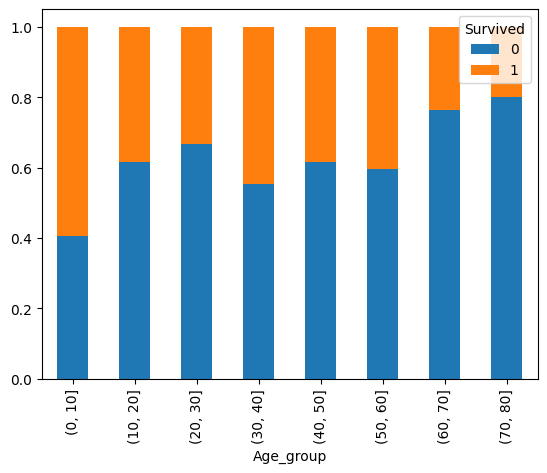

In [477]:
#create a stacked bar plot of the relative survival/non survial for age groups in 10 year bins
age_bins = pd.cut(continuous_features['Age_no_missing'], bins=np.arange(0,90,10))
age_bins = age_bins.rename('Age_group')
age_groups = pd.concat([age_bins, label], axis=1)
age_groups = age_groups.groupby(['Age_group','Survived']).size().unstack()
age_groups = age_groups.div(age_groups.sum(axis=1), axis=0)
age_groups.plot(kind='bar', stacked=True)



# Feature selection for non-continous data using chi2 test (label=class)

In [478]:
#construct a new dataframe with all features except age, fare, Passenger ID and the normalized features
features_non_continous = features.drop(columns=['PassengerId','Age', 'Fare','PassengerId_normalized','Age_normalized', 'Fare_normalized','SibSp_normalized','Parch_normalized'])

#combine features_non_continous with label
non_continous_df = pd.concat([features_non_continous,label],axis=1)
non_continous_df

,Pclass,Name,Sex,SibSp,Parch,Ticket,Cabin,Embarked,Survived
0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,NaN,S,0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,C85,C,1
2,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,NaN,S,1
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,C123,S,1
4,3,"Allen, Mr. William Henry",male,0,0,373450,NaN,S,0
...,...,...,...,...,...,...,...,...,...
886,2,"Montvila, Rev. Juozas",male,0,0,211536,NaN,S,0
887,1,"Graham, Miss. Margaret Edith",female,0,0,112053,B42,S,1
888,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,1,2,W./C. 6607,NaN,S,0
889,1,"Behr, Mr. Karl Howell",male,0,0,111369,C148,C,1


In [479]:
# perform chi-squared test for nominal features
from scipy.stats import chi2_contingency

non_cont_columns = non_continous_df.columns

#create a new dataframe which contains chi2 values for all feature combinations
chi2_values = pd.DataFrame(index=non_cont_columns, columns=non_cont_columns)
for i in non_cont_columns:
    for j in non_cont_columns:
        df_chi2 = non_continous_df[[i,j]]
        data_cont=pd.crosstab(df_chi2.iloc[:,0], df_chi2.iloc[:,1])
        stat, p, dof, expected = chi2_contingency(data_cont)
        chi2_values.loc[i,j] = p
chi2_values

,Pclass,Name,Sex,SibSp,Parch,Ticket,Cabin,Embarked,Survived
Pclass,0.0,0.482181,0.000206,0.000001,0.378539,0.0,0.000008,0.0,0.0
Name,0.482181,0.239668,0.484248,0.474291,0.474291,0.268138,0.273778,0.482161,0.484248
Sex,0.000206,0.484248,0.0,0.0,0.0,0.714624,0.381402,0.001259,0.0
SibSp,0.000001,0.474291,0.0,0.0,0.0,0.00002,0.0016,0.007704,0.000002
Parch,0.378539,0.474291,0.0,0.0,0.0,1.0,0.775714,0.1585,0.000097
Ticket,0.0,0.268138,0.714624,0.00002,1.0,0.0,0.0,0.0,0.011527
Cabin,0.000008,0.273778,0.381402,0.0016,0.775714,0.0,0.0,0.002031,0.183574
Embarked,0.0,0.482161,0.001259,0.007704,0.1585,0.0,0.002031,0.0,0.000002
Survived,0.0,0.484248,0.0,0.000002,0.000097,0.011527,0.183574,0.000002,0.0


In [439]:
#!pip install --upgrade seaborn


<Axes: >

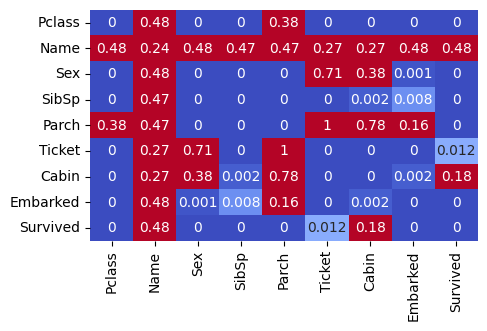

In [480]:
#display chi2 p-values as a color coded heatmap with a threshold of 0.05, round p-values to 2 digits
plt.figure(figsize=(5,3))
sns.heatmap(round(chi2_values.astype(float),3), annot=True, cmap='coolwarm', cbar=False, vmin=0, vmax=0.05)


- We see a lot of relationships between the features
- Passenger Class and Sex are related to label, which is no surprise
- SibSp and Parch were assumed to be related, which is proven here (note that they were not sufficiently correlated)
- Even Ticket and Embarked seem to be useful

Let's see how these features relate to the label in a diagram

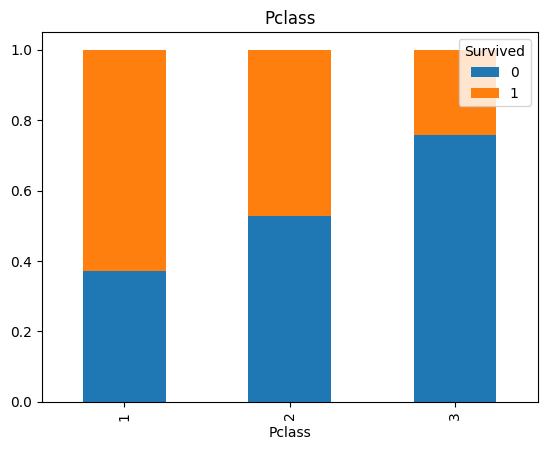

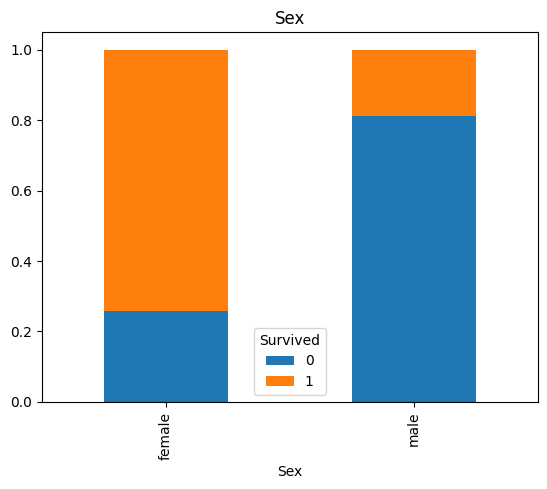

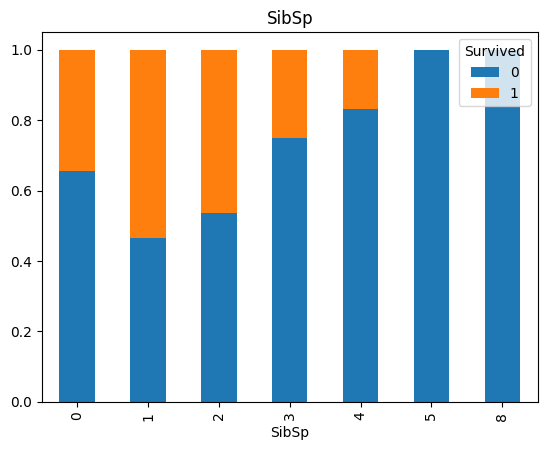

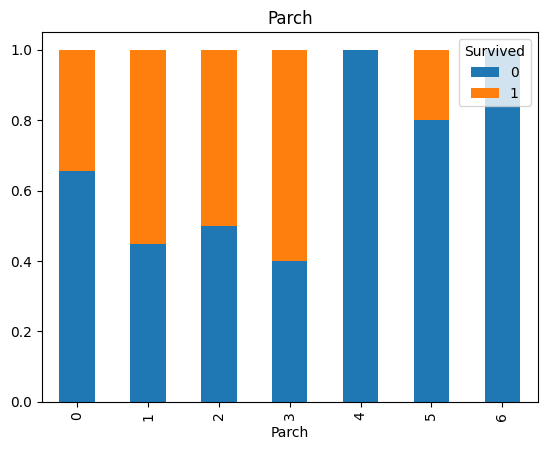

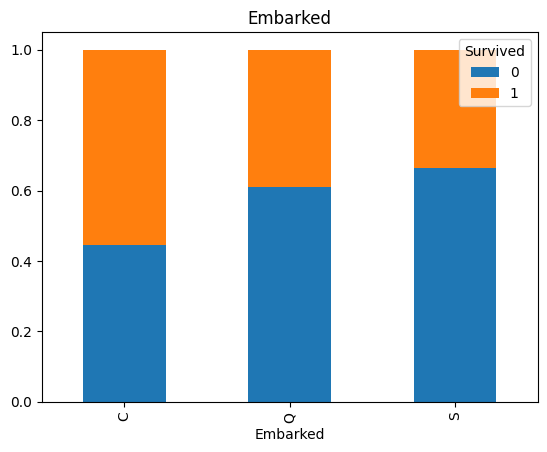

In [481]:
columns_of_interest = ['Pclass','Sex','SibSp','Parch','Embarked']
#create a stacked bar plot of the relative survival/non survial for columns of interest
for col in columns_of_interest:
    data = pd.crosstab(non_continous_df[col], non_continous_df['Survived'])
    data = data.div(data.sum(axis=1), axis=0)
    data.plot(kind='bar', stacked=True)
    plt.title(col)
    plt.show()



Finally we will check the feature "Ticket"

In [482]:
non_continous_df['Ticket']

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, Length: 891, dtype: object

In [483]:
#show length of values in feature 'Ticket'
non_continous_df['Ticket'].str.len().value_counts()

Ticket
6     419
5     131
4     101
8      76
10     41
7      27
9      26
17     14
16     11
12     10
13     10
15      9
11      8
18      6
3       2
Name: count, dtype: int64

In [484]:
#create a new feature 'Ticket_length' and fill missing values with mean
ticket_length = non_continous_df['Ticket'].str.len().fillna(non_continous_df['Ticket'].str.len().mean())

C:\Users\Hendrik Meth\AppData\Local\Temp\ipykernel_25460\1127963806.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ticket_length_groups = ticket_length_groups.groupby(['Ticket_length_group','Survived']).size().unstack()


<Axes: xlabel='Ticket_length_group'>

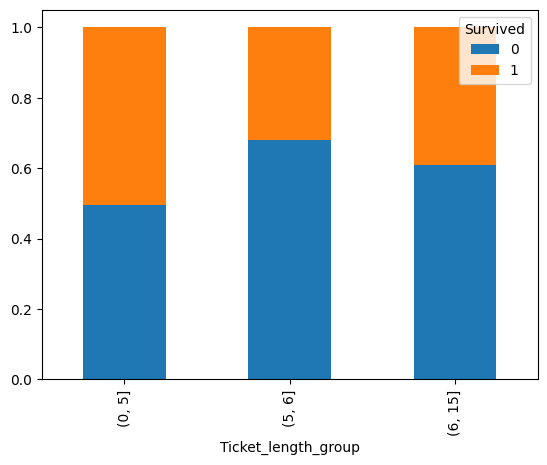

In [485]:
#create three groups for ticket length: < 6, 6, > 6 and plot the relative survival/non survival
ticket_length_groups = pd.cut(ticket_length, bins=[0,5,6,15])
ticket_length_groups = ticket_length_groups.rename('Ticket_length_group')
ticket_length_groups = pd.concat([ticket_length_groups, label], axis=1)
ticket_length_groups = ticket_length_groups.groupby(['Ticket_length_group','Survived']).size().unstack()
ticket_length_groups = ticket_length_groups.div(ticket_length_groups.sum(axis=1), axis=0)
ticket_length_groups.plot(kind='bar', stacked=True)


C:\Users\Hendrik Meth\AppData\Local\Temp\ipykernel_25460\3703124230.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ticket_length_groups = ticket_length_groups.groupby(['Ticket_length_group','Survived']).size().unstack()


<Axes: xlabel='Ticket_length_group'>

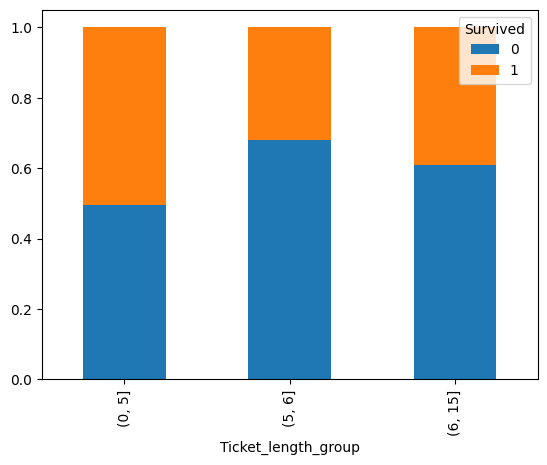

In [486]:
#create three groups for ticket length: < 6, 6, > 6 and plot the relative survival/non survival
ticket_length_groups = pd.cut(ticket_length, bins=[0,5,6,15])
ticket_length_groups = ticket_length_groups.rename('Ticket_length_group')
ticket_length_groups = pd.concat([ticket_length_groups, label], axis=1)
ticket_length_groups = ticket_length_groups.groupby(['Ticket_length_group','Survived']).size().unstack()
ticket_length_groups = ticket_length_groups.div(ticket_length_groups.sum(axis=1), axis=0)
ticket_length_groups.plot(kind='bar', stacked=True)

C:\Users\Hendrik Meth\AppData\Local\Temp\ipykernel_25460\553139613.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ticket_length_groups_pclass = ticket_length_groups_pclass.groupby(['Ticket_length_group','Pclass']).size().unstack()


<Axes: xlabel='Ticket_length_group'>

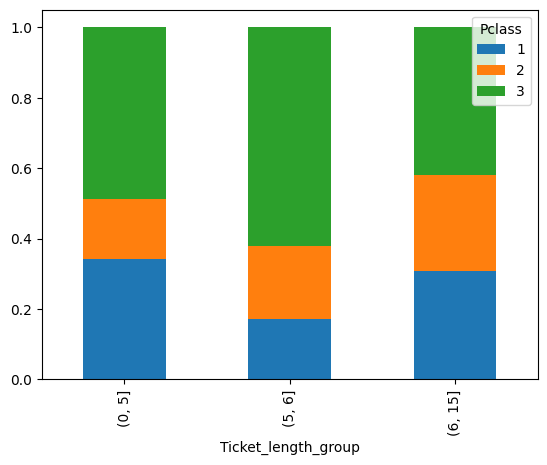

In [491]:
#create a stacked bar plot showing ticket length groups and PClass
ticket_length_groups = pd.cut(ticket_length, bins=[0,5,6,15])
ticket_length_groups = ticket_length_groups.rename('Ticket_length_group')

ticket_length_groups_pclass = pd.concat([ticket_length_groups, non_continous_df['Pclass']], axis=1)
ticket_length_groups_pclass = ticket_length_groups_pclass.groupby(['Ticket_length_group','Pclass']).size().unstack()
ticket_length_groups_pclass = ticket_length_groups_pclass.div(ticket_length_groups_pclass.sum(axis=1), axis=0)
ticket_length_groups_pclass.plot(kind='bar', stacked=True)




# Summary
- Analysis of variance: Age, SibSp, Parch, Fare should be selected in this sequence
- Analysis of variation ratio: Pclass, Sex, SibSp, Parch, Embarked should be selected in this sequence
- Analyis of correlation: only Fare looks promising
- Anova test: Fare, Parch and Age should be selected
- Chi square: Pclass, Sex, Embarked, Sibsp and Parch are related and even ticket (which is related to Pclass)

# Conclusion
- 8 out of 11 features seem to be promising predictors, altough correlation analysis just suggested to take "Fare"
- Only PassengerID, Name and Cabin do not seem to be relevant